# Análisis de videojugos, ¿tienen éxito o o no?

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Carga de librerías y datos](#data_review)
* [Exploración de datos](#explore)
* [Preparación de datos](#data_preprocessing)
    * [Reemplazo de los nombres de las columnas](#header_style)
    * [Manejo de datos ausentes](#missing_values)
    * [Corrección en tipo de datos](#duplicates)
    * [Añado de columna](#data_preprocessing_conclusions)
* [Análisis de los datos](#analisis)
    * [Número de juegos lanzados en diferentes años](#1)
    * [Distribución de número de ventas de las plataformas](#2)
    * [Distribución de número de juegos de las plataformas](#3)
    * [Plataformas que antes eran populares y ahora ya no lo son](#4)
    * [Periodo de mayor número de ventas](#5)
    * [Rentabilidad de los juegos por género](#6)

* [Perfil de usuario para cada región](#perfil)
    * [Plataformas principales](#header_style)
    * [Géneros principales](#missing_values)
    * [Ranking vs ventas](#duplicates)
* [Análisis de los datos](#analisis)
    * [Números de juegos lanzados en diferentes años](#header_style)
    * [Periodo de mayor número de ventas](#missing_values)
    * [Rentabilidad de los juegos por género](#duplicates)
* [Prueba de hipótesis](#hypotheses)
    * [Calificaciones promedio de los usuarios para las plataformas Xbox One y PC](#activity)
    * [Calificaciones promedio de los usuarios para los géneros de Acción y Deportes ](#week)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>

Este proyecto consiste en preparar un informe sobre las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) que evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.
Se identifica patrones que determinen si un juego tiene éxito o no que servirá para detectar proyectos prometedores y planificar campañas publicitarias.

## Carga de librerías y archivos <a id='data_review'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#cargar el dataset
df = pd.read_csv('/datasets/games.csv')

## Exploración de datos 

In [3]:
#panorama inicial
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#busqueda de datos ausentes
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#busqueda de duplicados
df.duplicated().sum()

0

- Se debe poner los nombres de las columnas en minúsculas.
- Hay que transformar la columna year_of_release y critic_score a int.
- Hay que transformar la columna user_score en int.
- La columna user_score tiene un string 'tbd.
- Hay valores ausentes en las columnas name, year_of_release, genre, critic_score, user_score y rating.
- No hay duplicados en la tabla

## Preparación de los datos

### Reemplazo de los nombres de las columnas 

In [7]:
#lista de los nombres
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
#convertir nombres a minúsculas
df.columns = df.columns.str.lower()

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Manejo de datos ausentes

* Se comprobó las filas que no tenían nombre del juego para comprobar si era importante tenerlas.

In [10]:
df[df['name'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Las dos filas sin nombre mejor se eliminaran porque no aportan información y son dos nomas.

In [11]:
df.dropna(subset = ['name'], inplace = True)
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Se busca relaciones de los datos ausentes en critic_score y user_score con otras columnas.

In [62]:
filter1 = df[df['user_score'].isnull()]
filter1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,,0.01


Las 3 columnas tienen datos, y se revisará su relación con las demás columna.

In [71]:
filter1['year_of_release'].value_counts()

2009    847
2010    799
2008    792
2011    644
2007    568
2006    454
2005    369
2002    365
1998    352
2012    314
1999    310
2015    309
2004    280
1997    272
2003    271
1996    255
2014    252
2013    245
2000    243
2016    240
2001    225
1995    219
1994    120
1993     60
1982     53
1981     46
1992     42
1991     41
1986     21
1989     17
1983     17
1987     16
1990     16
1984     14
1988     14
1985     12
1980      9
Name: year_of_release, dtype: Int64

In [73]:
filter1['platform'].value_counts()

DS      1635
PS      1035
PS2      920
PSP      788
Wii      760
GBA      567
PS3      454
3DS      346
N64      319
X360     296
PSV      287
SNES     239
XB       238
PC       204
GC       190
SAT      173
PS4      135
2600     133
GB        98
NES       98
XOne      65
WiiU      47
DC        38
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

La mayoría de datos ausentes se encuentra en datos de la plataforma DS y PS

- Los datos ausentesde la columna year_of_release se imputaron con la mediana de la plataforma.

In [14]:
platform_median = df.groupby('platform')['year_of_release'].median() 

In [15]:
 def year_fixed(row):
    platform = row['platform']
    if pd.isna(row['year_of_release']):
        return platform_median[platform]
    else:
        return row['year_of_release']

In [16]:
df['year_of_release'] = df.apply(year_fixed, axis=1)

In [17]:
#comprobacion
df['year_of_release'].isna().sum()

0

### Correción de tipo de datos

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* La columna 'user_score' debe ser cambiada a 'float' pero tiene datos tipos string por lo que se cambiará esos datos a NA y se procederá a cambiar el tipo de datos para la columna.

In [19]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)

* Donde están los datos ausentes en 'rating', se llenará con cadenas vacias por que son datos categoricos y los datos ausentes son aleatorios.

In [20]:
df['rating'] = df['rating'].fillna(value='')

- Los datos the year_of release y critic_score son enteros por lo que se cambia a su respectivo tipo.

In [21]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [22]:
df['critic_score'] = df['critic_score'].astype('Int64')

- Una columna de las ventas totales ayudará en el análisis.

### Añado de columna 

In [23]:
df['total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

- Comprobación de los datos.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total            16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
total                 0
dtype: int64

## Análisis de los datos

### Número de juegos lanzados en diferentes años

In [26]:
x = df.groupby('year_of_release')['name'].count()

[Text(0.5, 1.0, 'Número de juegos en diferentes años')]

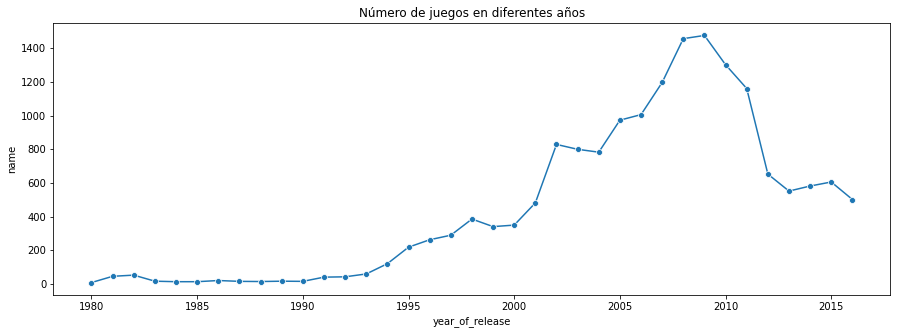

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data=x, marker='o').set(title='Número de juegos en diferentes años')

In [28]:
df['year_of_release'].value_counts().head(10)

2009    1476
2008    1457
2010    1302
2007    1197
2011    1161
2006    1006
2005     973
2002     829
2003     800
2004     783
Name: year_of_release, dtype: Int64

- El 2008 y 2009 han sido los años que más juegos se ha lanzado.
- En el periodo 2005 - 2011 se observa un pico alto, que han sido los años con más juegos lanzados.
- De 1980 hasta de 1993 las ventas de juegos son bajas hasta cero.
- En 1995 se comienza a ver un crecimiento en ventas significativo.

### Distribución de número de ventas de las plataformas

In [29]:
platform_duration = pd.pivot_table(df, values = 'year_of_release', index = 'platform', aggfunc = ['min', 'max'])
platform_duration.columns = ('min_year', 'max_year')
platform_duration['year_of_duration'] = platform_duration['max_year'] - platform_duration['min_year']
platform_sales = pd.pivot_table(df, values = 'total', index = 'platform', aggfunc = 'sum')
platform_data = platform_duration.merge(platform_sales, on = 'platform')
platform_data.reset_index(inplace = True)
platform_data

,platform,min_year,max_year,year_of_duration,total
0,2600,1980,1989,9,96.98
1,3DO,1994,1995,1,0.10
2,3DS,2011,2016,5,259.00
3,DC,1998,2008,10,15.95
4,DS,1985,2013,28,806.12
5,GB,1988,2001,13,255.46
6,GBA,2000,2007,7,317.85
7,GC,2001,2007,6,198.93
8,GEN,1990,1994,4,28.35
9,GG,1992,1992,0,0.04


In [30]:
platform_data['year_of_duration'].median()

6.0

- Se elaboró una tabla con el año que se lanzó cada plataforma, y el año en que terminó para determinar el tiempo de duración de cada plataforma.
- El tiempo promedio de las plataformas es de 6 años.

<AxesSubplot:xlabel='platform', ylabel='total'>

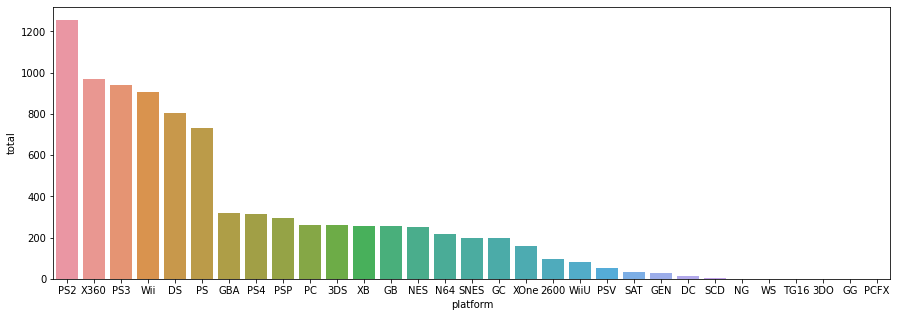

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data = platform_data.sort_values(by = 'total', ascending = False), x = "platform", y = "total")

- Las 6 plataformas que representan un número de ventas significativo son la PS2, X360, PS3, Wii, DS y PS. Con estas plataformas importantes se observará la distribución por años.

In [32]:
##Tabla filtrada por las plataformas con las mayores ventas
platforms_mayor = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
mayor_sales = df[df['platform'].isin(platforms_mayor)][['platform', 'year_of_release', 'total']]

##Tabla dinámica con la suma de ventas por años de las platafomras con mayores ventas
group_sales = pd.pivot_table(mayor_sales, index = ['platform', 'year_of_release'], 
                             values = 'total', aggfunc = 'sum')

##tabla dinamica con el número de juegos cada año de cada plataforma
num_games = pd.pivot_table(df, index = ['platform', 'year_of_release'], 
                           values = 'name', aggfunc = 'count')

##union de las tablas
platform_mayor = group_sales.merge(num_games, how='left', on = ['platform', 'year_of_release'])
platform_mayor.rename(columns={"name": "num_games"}, inplace=True)
platform_mayor.reset_index(inplace = True)
platform_mayor

,platform,year_of_release,total,num_games
0,DS,1985,0.02,1
1,DS,2004,17.27,23
2,DS,2005,130.14,118
3,DS,2006,119.81,201
4,DS,2007,146.94,376
...,...,...,...,...
62,X360,2012,99.74,106
63,X360,2013,88.58,75
64,X360,2014,34.74,63
65,X360,2015,11.96,35


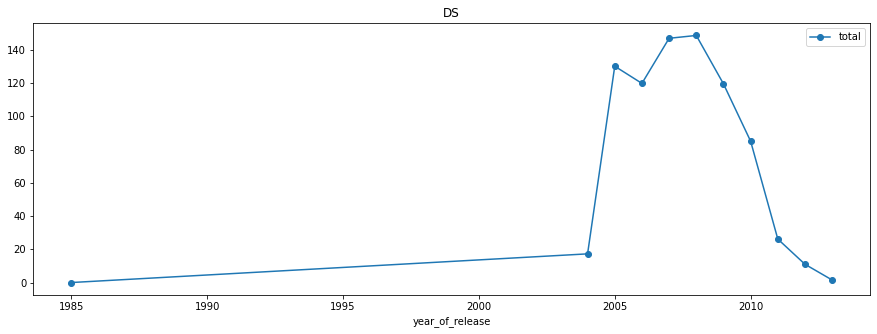

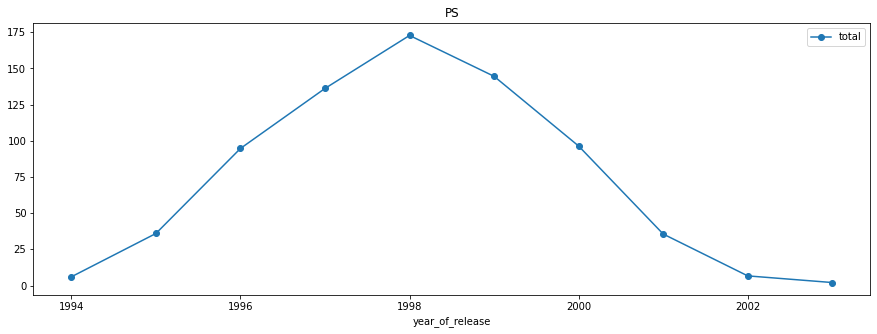

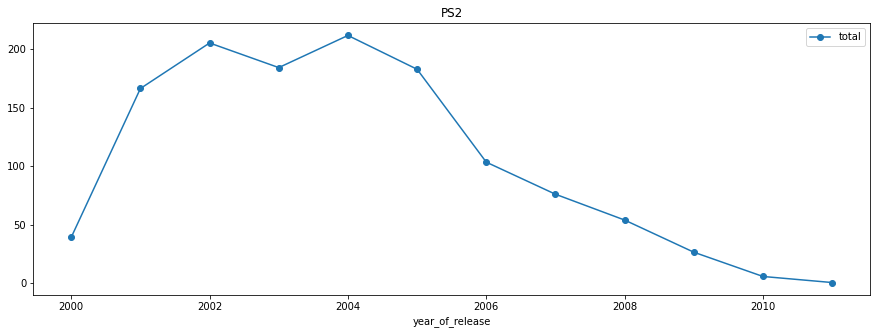

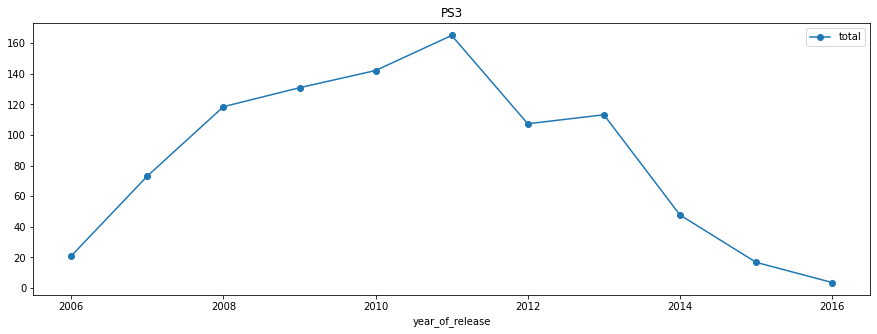

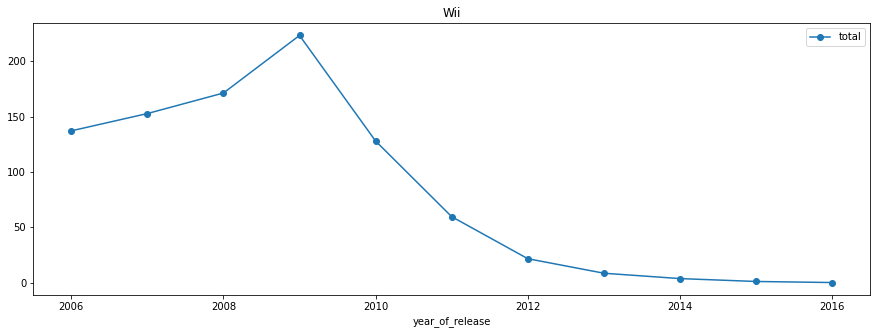

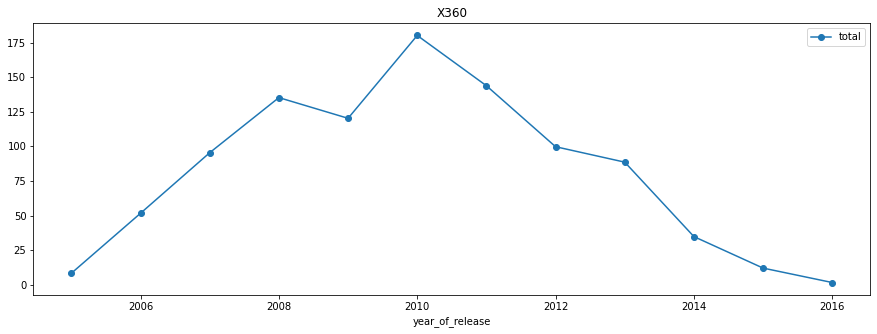

In [33]:
for values, group_data in platform_mayor.groupby('platform'):
    group_data.plot(kind = 'line', y = 'total', x = 'year_of_release',
                title = values, style = 'o-', figsize = (15,5))

- En la plataforma DS se observa un punto atípico ya que no tiene ventas hasta 2004, por lo que se lo imputará ya que al pacecer la fecha de lanzamiento es errónea

In [34]:
df.query("platform == 'DS' and year_of_release == 1985")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,,0.02


In [35]:
df.loc[15957, 'year_of_release'] = 2004

- En la distribución basada en los datos de cada año, se observa un pico alto para todas las plataformas con mayores ventas dentro del periodo con mayores ventas en el tiempo a excepción de la plataforma PS que solía ser popular en 1998 y en 2003 ya no tenía ventas.
- En todas las plataformas con mayores ventas se observa ventas altas por un periodo de 4 a 6 años y luego empiezan a decaer.
- A excepción de la plataforma Wii, todas las plataformas empiezan teniendo ventas bajas y en 1 año han tenido resultados favorables, y en un periodo de 2 a 5 años han presentado su pico más alto en ventas. 

### Distribución de número de juegos de las plataformas

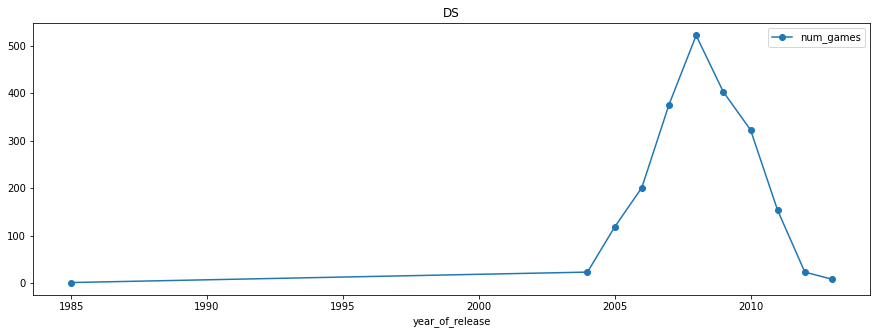

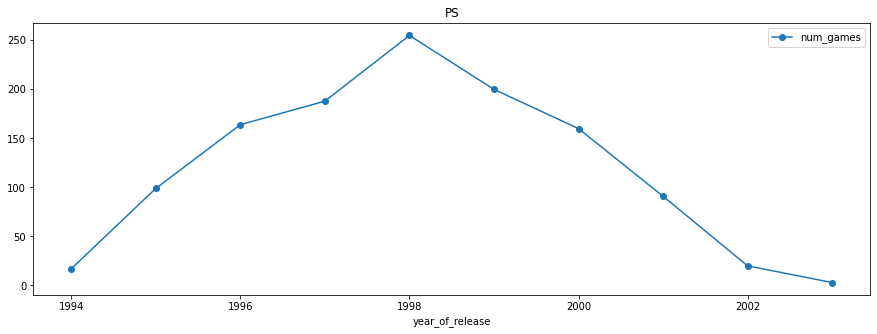

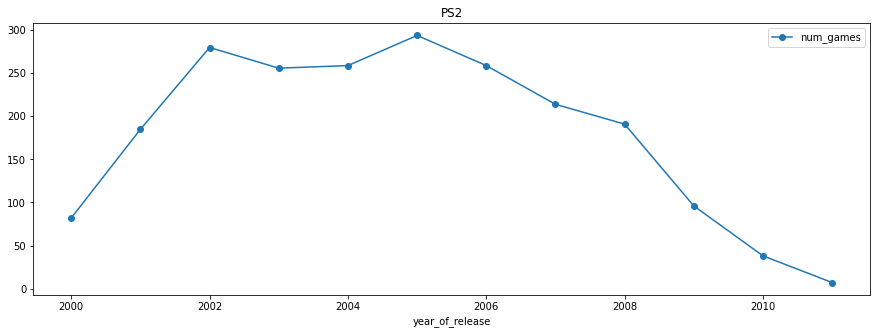

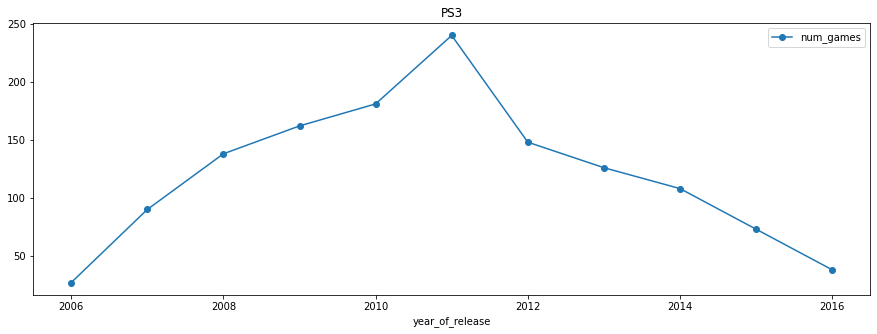

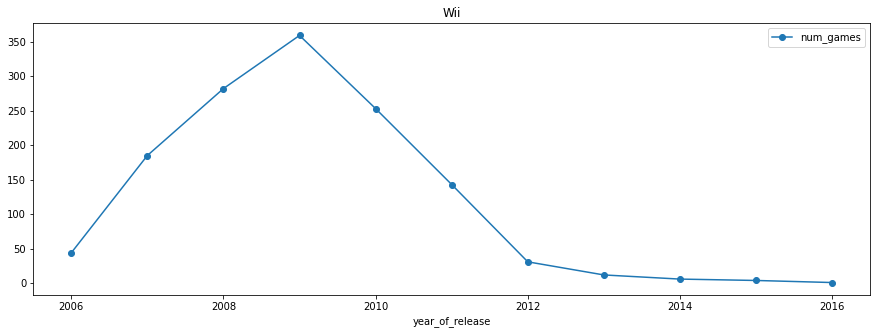

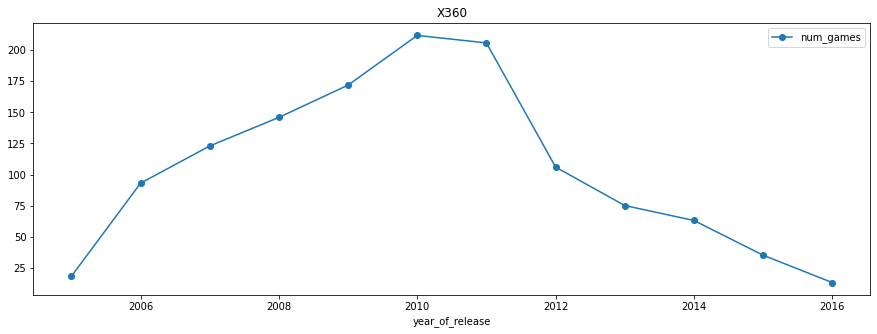

In [36]:
for values, group_data in platform_mayor.groupby('platform'):
    group_data.plot(kind = 'line', y = 'num_games', x = 'year_of_release',
                title = values, style = 'o-', figsize = (15,5))

- Al observar la distribución de los juegos podemos considerar que al vender menos de 100 juegos las plataformas ya está casi muerta por lo que las plataformas deberían tener más de eso para prosperar.

### Plataformas que antes eran populares y ahora ya no lo son

- Tomando las plataformas que ganan más de 100 millones como exitosas, se filtrará con los datos menores a 2016.

In [37]:
filter = platform_data.query("total > 100 and max_year < 2016")
filter

,platform,min_year,max_year,year_of_duration,total
4,DS,1985,2013,28,806.12
5,GB,1988,2001,13,255.46
6,GBA,2000,2007,7,317.85
7,GC,2001,2007,6,198.93
10,N64,1996,2002,6,218.68
11,NES,1983,1994,11,251.05
15,PS,1994,2003,9,730.86
16,PS2,2000,2011,11,1255.77
19,PSP,2004,2015,11,294.05
23,SNES,1990,1999,9,200.04


- Se observa 11 plataformas como exitosas y se sacará la mediana porque tiene valores alejados de la mediana.

In [38]:
platform_duration_median = filter['year_of_duration'].median().astype('int')
print(f'Las plataformas que solían ser populares han tardado en desaparecer {platform_duration_median} años en promedio.')

Las plataformas que solían ser populares han tardado en desaparecer 9 años en promedio.


### Periodo de mayor número de ventas

Se filtró los datos que están dentro de periodo 2005 - 2011 porque tuvo más ventas y tienen información valioso para determinar el exito de un juego mejor.

In [39]:
df_filtered = df.query("2004 < year_of_release < 2011")

<AxesSubplot:xlabel='platform', ylabel='total'>

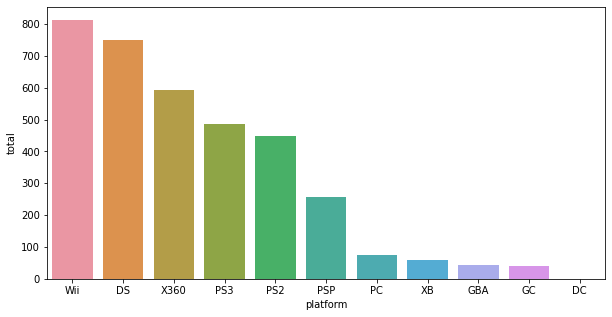

In [40]:
#tabla por plataforma
platform_filtered = pd.pivot_table(df_filtered, values = 'total', index = 'platform', aggfunc = 'sum')
platform_filtered.reset_index(inplace = True)

#Grafico de ventas
plt.figure(figsize=(10,5))
sns.barplot(data = platform_filtered.sort_values(by = 'total', ascending = False), x = "platform", y = "total")

- Las  seis plataformas con más ventas en ese periodo fueron Wii, DS, X360, PS3 y PS2 PSP que tiene ventas significativas. Con estas plataformas se hará una distribución por años. 

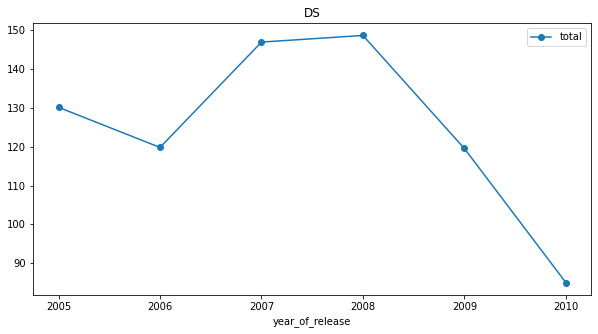

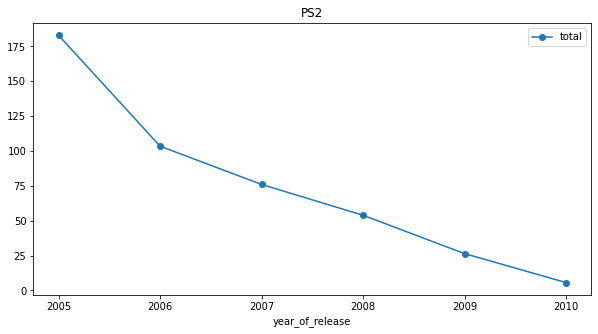

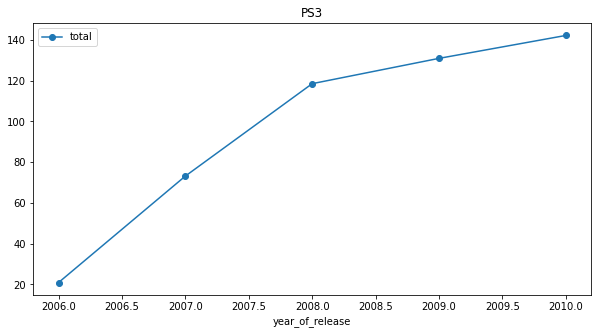

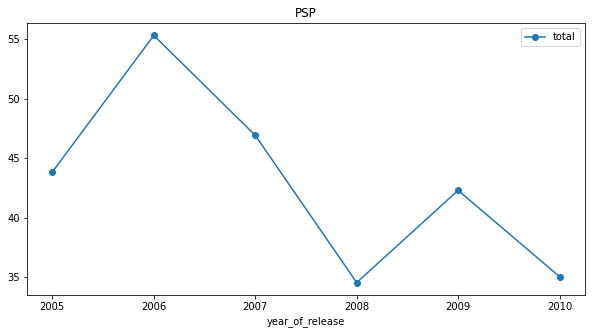

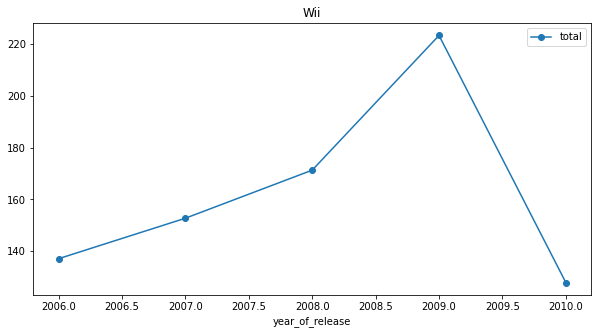

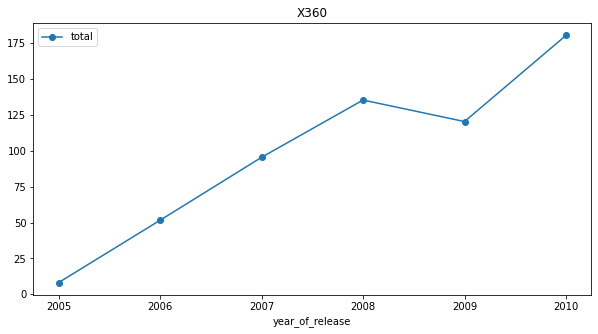

In [41]:
platforms_filtered = ['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PSP']
sales = df_filtered[df_filtered['platform'].isin(platforms_filtered)][['platform', 'year_of_release', 'total']]

##Tabla dinámica con la suma de ventas por años de las platafomras con mayores ventas
sales_group = pd.pivot_table(sales, index = ['platform', 'year_of_release'], 
                             values = 'total', aggfunc = 'sum')
sales_group.reset_index(inplace = True)
sales_group

#gráfico de la distribución de ventas 
for values, group_data in sales_group.groupby('platform'):
    group_data.plot(kind = 'line', y = 'total', x = 'year_of_release',
                title = values, style = 'o-', figsize = (10,5))

- Se puede observar que las ventas cayeron en el periodo de 5 años a excepción del PS3 y X360 que tenía tendencia en subir sus ventas. Habría que revisar que tuvieron de especial para presentar una tendencia a subir después de 5 años.
- Las plataformas que bajaron tienen un decrecimiento lineal mientras que la plataforma Wii alcanzó un pico alto y cayó drásticamente.

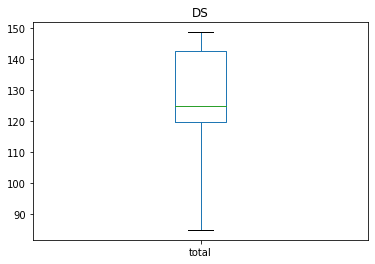

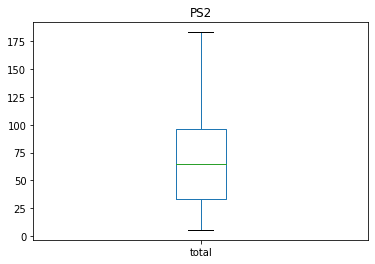

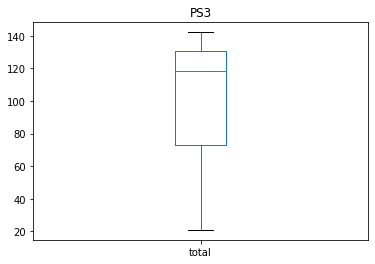

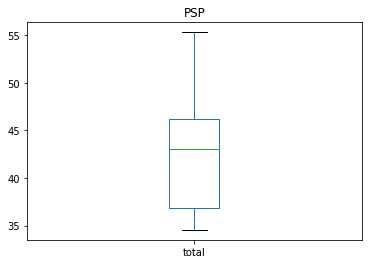

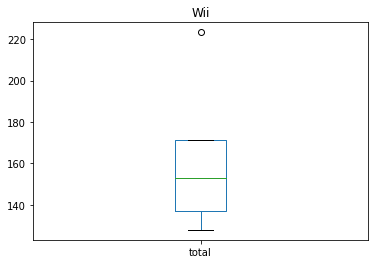

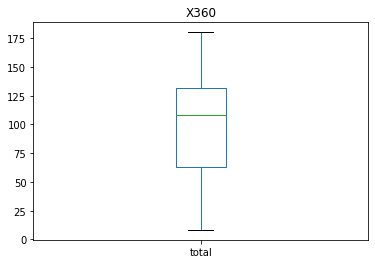

In [42]:
#diagrama de cajas de las ventas 
for platform in sales_group['platform'].unique():
    unique_platform = sales_group.loc[sales_group['platform'] == platform]
    unique_platform.plot(kind = 'box', y = 'total',title = platform)

- El 75% de las ventas en las plataformas PS3 y X360 que presentaron una tendencia positiva es de 60 y 80 millones o más respectivamente, y su mediana es de 110 millones, que muestra un crecimiento grande
- Las platafromas Wii y Ds tienen más ventas que las tienen tendencia a subir pero su mediana es de 10 millones con respecto al 75% de sus ventas, lo que no muestra un gran crecimiento cada año. 

<AxesSubplot:xlabel='user_score', ylabel='total'>

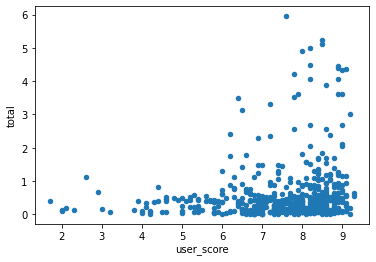

In [43]:
#grafico de dispersión de las reseñas de usuarios
df_psp = df_filtered.query("platform == 'PS2'")
df_psp.plot(kind = 'scatter', x = 'user_score', y = 'total')

<AxesSubplot:xlabel='critic_score', ylabel='total'>

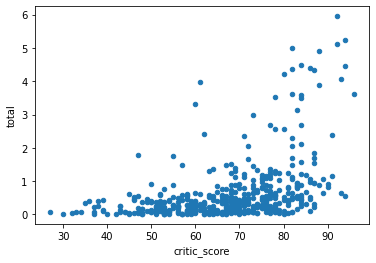

In [44]:
#grafico de dispersión de las reseñas de profesionales
df_psp = df_filtered.query("platform == 'PS2'")
df_psp.plot(kind = 'scatter', x = 'critic_score', y = 'total')

- Se escogió la plataforma PSP para obersevar como las reseñas de usuarios y profesionales afectan las ventas la plataforma y se observa una relacion nula ya que la mayoría de datos se encuentra de manera lineal, también se observa algunos caso que han presentado una relación positiva.

In [45]:
df_psp['user_score'].corr(df_psp['total'])

0.18003126376126574

- En el test de correlación efectivamente se muestra una baja correlación menor al 50%.

In [46]:
#tabla filtrada
games = df_filtered.query("platform == ('PS2','PS3')")
games_filter = games[games.duplicated(['name'], keep=False)]
games_filter.sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
1785,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65,6.6,T,1.15
4475,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,<NA>,NaN,,0.43
8688,AC/DC LIVE: Rock Band Track Pack,PS2,2008,Misc,0.08,0.06,0.00,0.02,<NA>,NaN,T,0.16
6834,AC/DC LIVE: Rock Band Track Pack,PS3,2008,Misc,0.21,0.01,0.00,0.02,60,5.3,T,0.24
4541,Bakugan: Battle Brawlers,PS2,2009,Action,0.21,0.16,0.00,0.05,<NA>,5.7,E,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...
10675,World Series of Poker 2008: Battle for the Bra...,PS3,2007,Misc,0.08,0.01,0.00,0.01,75,NaN,T,0.10
7064,World Soccer Winning Eleven 2010: Aoki Samurai...,PS3,2010,Sports,0.00,0.00,0.23,0.00,<NA>,NaN,,0.23
10955,World Soccer Winning Eleven 2010: Aoki Samurai...,PS2,2010,Sports,0.00,0.00,0.09,0.00,<NA>,NaN,,0.09
4664,pro evolution soccer 2011,PS2,2010,Sports,0.04,0.21,0.05,0.11,<NA>,6.7,E,0.41


In [47]:
games_filter['platform'].unique()

array(['PS3', 'PS2'], dtype=object)

- Se realizó una tabla con los datos de los juegos que se encuentran en dos plataformas PS2 y PS3.

<AxesSubplot:xlabel='user_score', ylabel='total'>

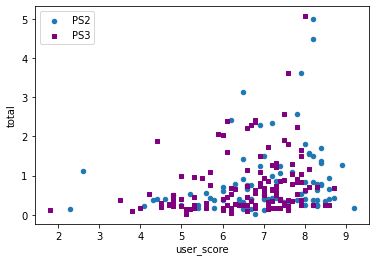

In [48]:
#grafico de dispersion de dos plataformas
games_filter_ps2 = games_filter.query("platform == 'PS2'")
games_filter_ps3 = games_filter.query("platform == 'PS3'")
ax = games_filter_ps2.plot(kind = 'scatter', x = 'user_score', y = 'total', label = 'PS2')
games_filter_ps3.plot(kind = 'scatter', x = 'user_score', y = 'total', color = 'Purple', marker = "s", label = 'PS3', ax = ax)

- En el gráfico de dispersión de la tabla recién filtrada se observa una baja correlación, pero se comprobará con un test de correlación.

In [49]:
games_filter['user_score'].corr(games_filter['total'])

0.2340594301288054

- Las reseñas de los usuarios con las ventas tienen una muy baja correlación.

### Rentabilidad de los juegos por género

<AxesSubplot:xlabel='genre'>

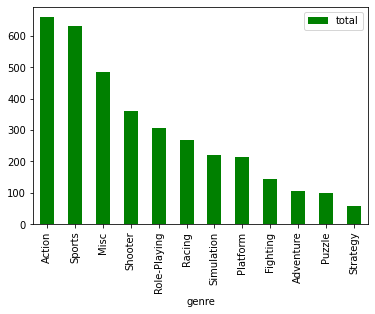

In [50]:
#tabla dinamica por genero
genres = pd.pivot_table(df_filtered, index = 'genre', values = 'total', aggfunc = 'sum'
                       ).sort_values(by = 'total', ascending = False)
#grafico de barras
genres.plot(kind = 'bar', color = 'Green')

- Se observa que los juegos de acción y de deportes son los géneros más rentables, con más de 600 millones de ventas, y claramente los juegos más populares son de ese género.

## Perfil de usuario para cada región

<AxesSubplot:title={'center':'Total region sales by platform'}, xlabel='Platform', ylabel='Total_sales'>

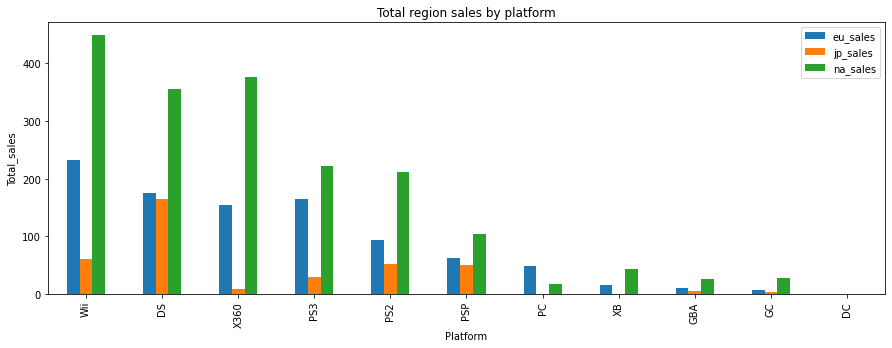

In [51]:
#tabla dinamica por plataforma
sales_region = pd.pivot_table(df_filtered, index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum'
                         ).sort_values(by = 'eu_sales', ascending = False)

#grafico de barras de cada region
sales_region.loc[sales_region.sum(axis=1).sort_values(ascending = False).index].plot(
    kind = 'bar', use_index = True, xlabel = 'Platform', ylabel = 'Total_sales', 
    title = 'Total region sales by platform', figsize=(15,5))

- La región de norteamérica es la que más contribuye a las ventas y las plataformas Wii, DS, X360 son las más importantes de la región.
- Las plataformas principales de europa son similares a las de norteamerica.
- Las plataforma DS es la principal en japón, y las que le siguen por una diferencia de más de 100 milones en ventas son Wii, PS2 y PSP.

<AxesSubplot:xlabel='Rating', ylabel='Sales'>

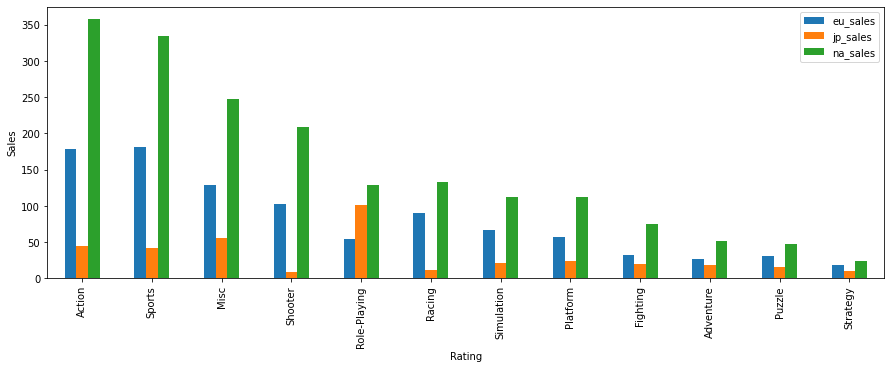

In [52]:
genre_region = pd.pivot_table(df_filtered, index = ['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], 
                              aggfunc = 'sum')
genre_region.loc[genre_region.sum(axis=1).sort_values(ascending = False).index].plot(
    kind = 'bar', ylabel = 'Sales', xlabel = 'Rating', figsize = (15,5))

- Los géneros principales en norteamerica son acción, deportes, misc y disparos.
- En europa es igual que norteamerica.
- En Japón los juegos de rol son los más populares, y por una diferencia de 50 millones menos en ventas aproximadavente le sigue los juegos de acción, deportes y Misc.

Text(0.5, 1.0, 'Sales y regions')

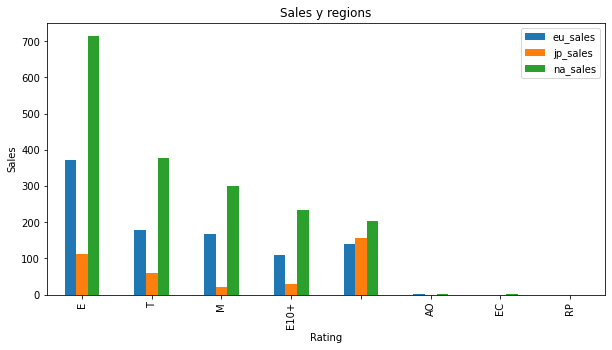

In [53]:
df_rating = pd.pivot_table(df_filtered, index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum'
                          ).sort_values(by = 'na_sales', ascending = False)
df_rating.plot(kind = 'bar', ylabel = 'Sales', xlabel = 'Rating', figsize = (10,5))
plt.title('Sales y regions')


- Las clasificaciones de ESRB si afectan a las ventas en cada región.
- Las clasificación E tiene más ventas en las 3 regiones.

## Comprobación de hipótesis

Ha = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Ho = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas..

In [54]:
df1 = df[df['user_score'].notna()]

- Para calcular las hipótesis se tuvo que eliminar los NA porque afectaba al análisis.

In [55]:
sports = df1[df1['genre'] == 'Sports']['user_score']
action = df1[df1['genre'] == 'Action']['user_score']

In [56]:
print('sports')
print('desviacion estandar: ', np.std(sports))
print('varianza: ', np.var(sports))
print('media: ', np.mean(sports))
print('median: ', np.median(sports))
print('moda: ', st.mode(sports))
print()
print('action')
print('desviacion estandar: ', np.std(action))
print('varianza: ', np.var(action))
print('media: ', np.mean(action))
print('median: ', np.median(action))
print('moda: ', st.mode(action))

sports
desviacion estandar:  1.6106398328543279
varianza:  2.594160671177017
media:  6.961196736174069
median:  7.4
moda:  ModeResult(mode=array([7.8]), count=array([57]))

action
desviacion estandar:  1.4250040890561086
varianza:  2.03063665382663
media:  7.054043715846995
median:  7.4
moda:  ModeResult(mode=array([8.]), count=array([80]))


In [57]:
alpha = 0.05
results = st.ttest_ind(sports, action, equal_var = False) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.11483818791498286
No podemos rechazar la hipótesis nula


Ho = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Ha = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC  son diferentes

In [58]:
xbox = df1[df1['platform'] == 'XOne']['user_score']
pc = df1[df1['platform'] == 'PC']['user_score'] 

In [59]:
print('xbox')
print('desviacion estandar: ', np.std(xbox))
print('varianza: ', np.var(xbox))
print('media: ', np.mean(xbox))
print('median: ', np.median(xbox))
print('moda: ', st.mode(xbox))
print()
print('pc')
print('desviacion estandar: ', np.std(pc))
print('varianza: ', np.var(pc))
print('media: ', np.mean(pc))
print('median: ', np.median(pc))
print('moda: ', st.mode(pc))

xbox
desviacion estandar:  1.377141546212499
varianza:  1.8965188383045526
media:  6.521428571428572
median:  6.8
moda:  ModeResult(mode=array([6.8]), count=array([8]))

pc
desviacion estandar:  1.5289693123266956
varianza:  2.3377471580367684
media:  7.062467532467533
median:  7.5
moda:  ModeResult(mode=array([8.2]), count=array([39]))


In [60]:
alpha = 0.05
results = st.ttest_ind(xbox, pc, equal_var = False) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  4.935072360183565e-06
Rechazamos la hipótesis nula


## Conclusión general

En conclusión, se pudo preparar los datos cambiando los datos de algunas columnas al tipo de datos correcto con la función astype(), corrigiendo los nombres de las columnas para que esten en minúsculas con str_lower() y manejando los datos ausentes en la columna tipo categorica reemplazando los NA con strings vacíos, en los numericos no se pudo eliminar los datos ausentes porque los NA eran aleaorios y las filas contenían información importante. También se añadió una columna de las ventas totales que ayudó en todo el proyecto a definir el éxito de los juegos.

Laas tablas dinámicas fueron de ayuda para determinar las plataformas principales y la distribución de sus ventas y juegos a través del tiempo. Se pudo determinar los géneros principales, clasificar por región y definir el periodo con la información importante. Las función query() también ayudó para filtrar las tablas juntos con los condicionales y la función merge() para unir tablas y crear dataset más completos.

Se visualizó las plataformas, genéros y clasificaciones principales con gráficos de barras. Los graficos lineales ayudaron a ver la distribución de los juegos y ventas a través del tiempo. La distribución de los datos se vio con el diagrama de cajas. Se utilizó también gráficos de dispersión para visualizar la correlación de las reseñas con las ventas.

Se pudo sacar las siguientes conclusiones: 
- El 2008 y 2009 han sido los años que más juegos se ha lanzado.
- En el periodo 2005 - 2011 se observó el pico más alto en ventas
- El tiempo promedio de vida de las plataformas es de 6 años.
- Las 6 plataformas que representaron un número de ventas significativo fueron la PS2, X360, PS3, Wii, DS y PS.
- Se observó que las ventas de las plataformas con mayores ventas se mantuvieron por un periodo de 4 a 6 años y luego empezaron a decaer.
- Las seis plataformas con más ventas en el periodo  2005 - 2010 fueron Wii, DS, X360, PS3 y PS2 PSP
- Las plataformas empiezan teniendo ventas bajas y en 1 año han tenido resultados favorables, y en un periodo de 2 a 5 años han presentado su pico más alto en ventas. 
- Al vender menos de 100 juegos las plataformas ya está casi muerta 
- Las plataformas que solían ser populares han tardado en desaparecer 9 años en promedio.
- El PS3 y X360 tuvieron tendencia a crecer en subir sus ventas en un periodo de 5 años.
- Al parecer para tener una proyección positiva en ventas, se debe tener un crecimiento de más de 50 millones cada año. 
- Las reseñas de los usuarios con las ventas tienen una muy baja correlación.
- Se observó que los juegos de acción y de deportes son los géneros más rentables
- Las plataformas principales de europa y norteamerica son  Wii, DS, X360.
- Las plataforma DS es la principal en japón.
- Los géneros principales en norteamerica y en europa son acción, deportes, misc y disparos.
- En Japón los juegos de rol son los más populares.
  Las clasificaciones de ESRB si afectan a las ventas en cada región.

Sobre la combrobación de hipótesis:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes